In [46]:
import os
import xarray as xr
import numpy as np
import cftime
import matplotlib.pyplot as plt


from osprey.means.eof import preproc_pattern_3D, preproc_timeseries_3D, preproc_var_3D, postproc_var_3D, preproc_forecast_3D
from osprey.actions.reader import reader_rebuilt, reader_nemo, preproc_nemo
from osprey.utils.folders import folders
from osprey.means.eof import save_EOF, detrend_3D
from osprey.means.means import globalmean, spacemean
from osprey.utils.time import get_startleg, get_year, get_forecast_year
from osprey.utils.utils import remove_existing_filelist, run_bash_command
from osprey.utils import cdo

In [3]:
expname = "lfr0"
var = "thetao"
ndim ="3D"
endleg = 50
yearspan = 10
yearleap = 10

In [4]:
startleg = get_startleg(endleg, yearspan)
startyear = get_year(startleg)
endyear = get_year(endleg)
window = endyear - startyear
# forecast year
foreyear = get_forecast_year(endyear, yearleap)
fdate = cftime.DatetimeGregorian(foreyear, 1, 1, 0, 0, 0, has_year_zero=False)
xf = xr.DataArray(data = np.array([fdate]), dims = ['time'], coords = {'time': np.array([fdate])}, attrs = {'stardand_name': 'time', 'long_name': 'Time axis', 'bounds': 'time_counter_bnds', 'axis': 'T'})

In [5]:
dirs = folders(expname)

In [6]:
cdo.merge(expname, startyear, endyear)

File /ec/res4/scratch/itas/martini/lfr0/050/data.nc not found.
Command: 'cdo cat /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2029-2029.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2030-2030.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2031-2031.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2032-2032.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2033-2033.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2034-2034.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2035-2035.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2036-2036.nc /ec/res4/scratch/itas/ece4/lfr0/output/nemo/lfr0_oce_1m_T_2037-2037.nc /ec/res4/scratch/itas/martini/lfr0/050/data.nc' 

cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >nav_lat_grid_T_inner<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >nav_lon_grid_T_inner<
cdi  warning (find_time_vars): Found more than one time variable

In [7]:
cdo.selname(expname, startyear, endyear, var)

File /ec/res4/scratch/itas/martini/lfr0/050/thetao.nc not found.
Command: 'cdo yearmean -selname,thetao /ec/res4/scratch/itas/martini/lfr0/050/data.nc /ec/res4/scratch/itas/martini/lfr0/050/thetao.nc' 




In [8]:
cdo.detrend(expname, startyear, endyear, var)

File /ec/res4/scratch/itas/martini/lfr0/050/thetao_anomaly.nc not found.


Command: 'cdo sub /ec/res4/scratch/itas/martini/lfr0/050/thetao.nc -timmean /ec/res4/scratch/itas/martini/lfr0/050/thetao.nc /ec/res4/scratch/itas/martini/lfr0/050/thetao_anomaly.nc' 
cdo    sub: Filling up stream2 >(pipe1.4)< by copying the first timestep.




In [9]:
cdo.get_EOF(expname, startyear, endyear, var)

 Time window  9
File /ec/res4/scratch/itas/martini/lfr0/050/thetao_variance.nc not found.
File /ec/res4/scratch/itas/martini/lfr0/050/thetao_pattern.nc not found.
Command: 'cdo eof3d,9 /ec/res4/scratch/itas/martini/lfr0/050/thetao_anomaly.nc /ec/res4/scratch/itas/martini/lfr0/050/thetao_variance.nc /ec/res4/scratch/itas/martini/lfr0/050/thetao_pattern.nc' 


Command: 'cdo eofcoeff3d /ec/res4/scratch/itas/martini/lfr0/050/thetao_pattern.nc /ec/res4/scratch/itas/martini/lfr0/050/thetao_anomaly.nc /ec/res4/scratch/itas/martini/lfr0/050/thetao_series_' 




In [10]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_pattern.nc")
pattern = xr.open_mfdataset(filename, use_cftime=True, preprocess=preproc_pattern_3D)
pattern

<xarray.Dataset> Size: 30MB
Dimensions:  (time: 9, y: 148, x: 180, z: 31)
Coordinates:
  * time     (time) object 72B 0001-01-01 00:01:00 ... 0001-01-01 00:09:00
    lon      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    lat      (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables:
    thetao   (time, z, y, x) float32 30MB dask.array<chunksize=(1, 1, 148, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         output/nemo/lfr0_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    timeStamp:    2024-Apr-12 20:31:08 GMT
    uuid:         1bd9b37f-d874-4f4a-8c11-2babbd1a8742
    history:      Fri Jun 21 16:20:53 2024: cdo eof3d,9 /ec/res4/scratch/itas...
    frequency:    year
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [11]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_series_00000.nc")
timeseries = xr.open_mfdataset(filename, use_cftime=True, preprocess=preproc_timeseries_3D)
timeseries

<xarray.Dataset> Size: 276B
Dimensions:            (time: 9, bnds: 2)
Coordinates:
  * time               (time) object 72B 2029-07-01 06:00:00 ... 2037-07-01 0...
    lon                float64 8B 0.0
    lat                float64 8B 0.0
    zaxis_Reduced      float64 8B 0.0
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds  (time, bnds) object 144B dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao             (time) float32 36B dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         output/nemo/lfr0_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    timeStamp:    2024-Apr-12 20:31:08 GMT
    uuid:         1bd9b37f-d874-4f4a-8c11-2babbd1a8742
    history:      Fri Jun 21 16:20:53 2024: cdo eofcoeff3d /ec/res4/scratch/i...
    frequency:    year
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [12]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_pattern.nc")
pattern = xr.open_mfdataset(filename, use_cftime=True, preprocess=preproc_pattern_3D)
field = pattern.isel(time=0)*0
for i in range(window):      
#    filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_series_0000{i}.nc")
    filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_series_0000{i}.nc")
    timeseries = xr.open_mfdataset(filename, use_cftime=True, preprocess=preproc_timeseries_3D)
    p = timeseries.polyfit(dim='time', deg=1, skipna = True)
    theta = timeseries[var].isel(time=-1)
    laststep = pattern.isel(time=i)
    field = field + theta*laststep

In [13]:
field

<xarray.Dataset> Size: 4MB
Dimensions:        (y: 148, x: 180, z: 31)
Coordinates:
    time           object 8B 0001-01-01 00:01:00
    lon            (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    lat            (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
  * z              (z) float32 124B 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
    zaxis_Reduced  float64 8B 0.0
Dimensions without coordinates: y, x
Data variables:
    thetao         (z, y, x) float32 3MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>

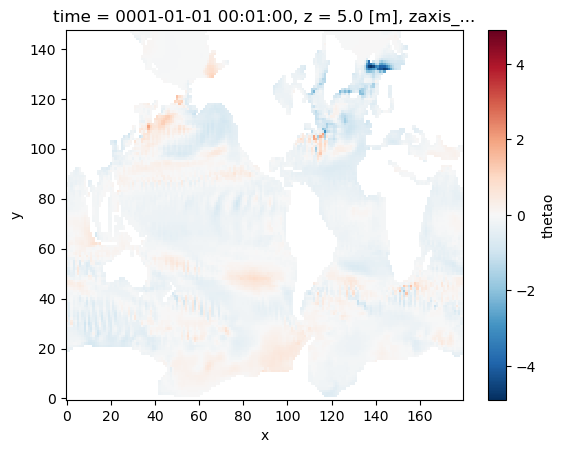

In [14]:
field['thetao'].isel(z=0).plot()

In [16]:
save_EOF(expname, startyear, endyear, field, var)

File /ec/res4/scratch/itas/martini/lfr0/050/thetao_product.nc not found.


In [17]:
cdo.retrend(expname, startyear, endyear, var)

File /ec/res4/scratch/itas/martini/lfr0/050/thetao_forecast.nc not found.
Command: 'cdo add /ec/res4/scratch/itas/martini/lfr0/050/thetao_product.nc -timmean /ec/res4/scratch/itas/martini/lfr0/050/thetao.nc /ec/res4/scratch/itas/martini/lfr0/050/thetao_forecast.nc' 

cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - time_counter_bnds
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - deptht_bnds
cdi  warning (cdfInqContents): Coordinates variable time_counter can't be assigned!
cdi  warning (cdfInqContents): Coordinates variable zaxis_Reduced can't be assigned!



In [31]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_forecast.nc")
fdata = xr.open_mfdataset(filename, use_cftime=True)
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}.nc")
xdata = xr.open_mfdataset(filename, use_cftime=True)

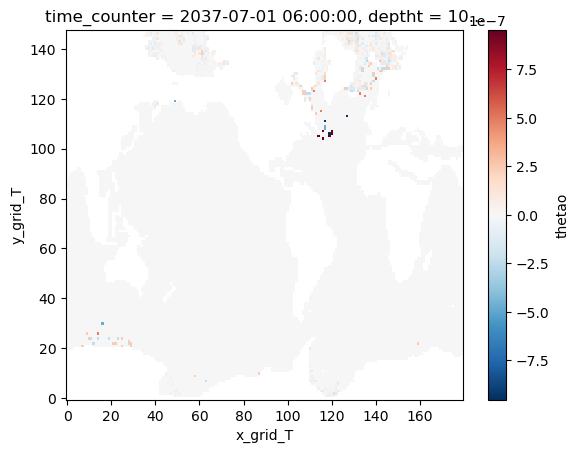

In [32]:
delta = xdata[var].isel(time_counter=-1,deptht=10)-fdata[var].isel(deptht=10)
delta.plot()

In [33]:
xdata = xdata.rename_dims({'x_grid_T': 'x', 'y_grid_T': 'y'})
xdata = xdata.rename({'nav_lat_grid_T': 'lat','nav_lon_grid_T': 'lon'})
xdata = xdata.rename({'time_counter': 'time'})
xdata = xdata.rename({'deptht': 'z'})

In [34]:
fdata = fdata.rename_dims({'x_grid_T': 'x', 'y_grid_T': 'y'})
fdata = fdata.rename({'nav_lat_grid_T': 'lat','nav_lon_grid_T': 'lon'})
fdata = fdata.rename({'deptht': 'z'})

In [41]:
fdata.attrs['name'] = xdata.attrs['name']

In [42]:
xpa = spacemean(xdata.isel(time=-1), var, '2D')
fpa = spacemean(fdata, var, '2D')

In [52]:
fpa['z'].values

array([4.9999380e+00, 1.5000288e+01, 2.5001759e+01, 3.5005413e+01,
       4.5013317e+01, 5.5029499e+01, 6.5061806e+01, 7.5125511e+01,
       8.5250366e+01, 9.5494286e+01, 1.0596992e+02, 1.1689624e+02,
       1.2869791e+02, 1.4219525e+02, 1.5896062e+02, 1.8196278e+02,
       2.1664792e+02, 2.7247672e+02, 3.6430304e+02, 5.1153476e+02,
       7.3220087e+02, 1.0332173e+03, 1.4056975e+03, 1.8308850e+03,
       2.2897678e+03, 2.7682424e+03, 3.2574788e+03, 3.7524421e+03,
       4.2504014e+03, 4.7499131e+03, 5.2502266e+03], dtype=float32)

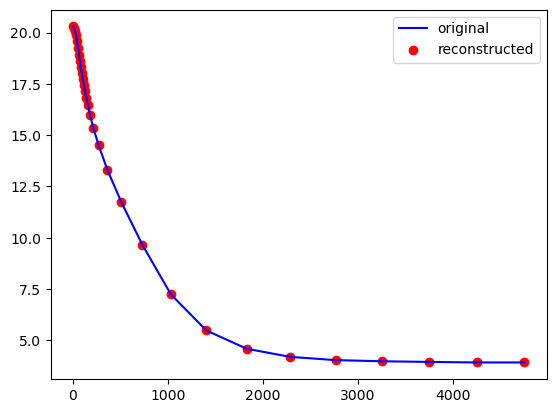

In [59]:
plt.plot(xpa['z'].values,xpa.values, color='b', label='original')
plt.scatter(fpa['z'].values,fpa.values, color='r', label='reconstructed')
plt.legend(loc="upper right")